In [2]:
from scipy.optimize import curve_fit as cf
from scipy import stats
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
mpl.rc('lines',linewidth=2)  
mpl.rc('figure', figsize=(10, 6))

In [4]:
def sinus(x,a,b,f,phi):
    return a+b*np.sin(x*2*np.pi*f+phi)

In [5]:
def sinus_line(x,a,b,c,f,phi):
    return a*x+b+c*np.sin(x*2*np.pi*f+phi)

In [6]:
def sinus_line_line(x,a,b,c,d,f,phi):
    return a*x+b+(c*x+d)*np.sin(x*2*np.pi*f+phi)

In [7]:
def weibull(x,l,k):
    return (k/l)*(x/l)**(k-1)*np.exp(-(x/l)**k)

In [8]:
def sinus_weibull(x,l,k,c,d,f,phi):
    return weibull(x,l,k)+weibull(x,l,k)*np.sin(x*2*np.pi*f+phi)

In [9]:
directoryPath = Path.cwd().joinpath('Outputs')
result=pd.read_csv(directoryPath.joinpath('period_30.csv'),squeeze=True,index_col=0,dtype='float64')
data=result['Electricity Tariff']
# data.head()

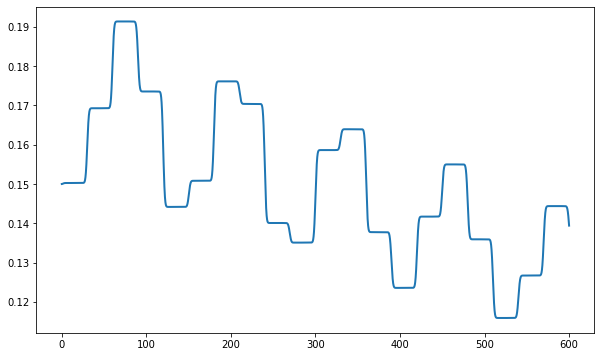

In [10]:
plt.plot(data)

In [11]:
maxTime=data.idxmax()
print(maxTime)

70.7763671875


In [45]:
first_x=data[:maxTime].index.to_numpy()
first_y=data[:maxTime].to_numpy()
first_line=stats.linregress(x=first_x,y=first_y)
first_line=stats.linregress(x=first_x,y=first_y)
second_x=data[maxTime:].index.to_numpy()
second_y=data[maxTime:].to_numpy()
second_line=stats.linregress(x=second_x,y=second_y)
siny=second_y-(second_line.slope*second_x+second_line.intercept)
a=np.average(siny)
b=np.max(siny)
T=np.median(np.diff(second_x[np.nonzero(np.diff(np.sign(siny)))[0]]))
f=1/(2*T)
phi=np.arcsin(siny[0]/b)-2*np.pi*f*maxTime
sin_pars1, cov = cf(f=sinus_line_line,xdata=first_x,ydata=first_y,p0=[first_line.slope,first_line.intercept,first_line.slope,b,f,0], maxfev=14000)
sin_pars2, cov = cf(f=sinus_line_line,xdata=second_x,ydata=second_y,p0=[second_line.slope,second_line.intercept,second_line.slope,b,f,phi], maxfev=14000)